In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import scipy

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv('data/Vehicles0514.csv', usecols=range(0, 22))
data.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

Mean = 243074.27272727274
Std = 212190.20259881375
Var = 45024682078.92562
Size = 11


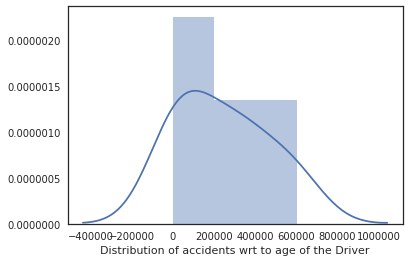

In [4]:
subset_data = data[['Accident_Index','Age_Band_of_Driver']]
subset_data = subset_data[subset_data.Age_Band_of_Driver != -1]
accidents_driver_age_band_data = list(subset_data.groupby(['Age_Band_of_Driver']).count().Accident_Index)
mean = np.mean(accidents_driver_age_band_data)
std = np.std(accidents_driver_age_band_data)
var = np.var(accidents_driver_age_band_data)
print("Mean = "+str(mean))
print("Std = "+str(std))
print("Var = "+str(var))

standardized_accidents_driver_age_band_data = [(x-mean)/std for x in  accidents_driver_age_band_data]
size = len(standardized_accidents_driver_age_band_data)
print("Size = "+str(size))

sns.distplot(accidents_driver_age_band_data, axlabel='Distribution of accidents wrt to age of the Driver')
#plt.plot(standardized_accidents_driver_age_band_data)
#plt.show()

In [74]:
print("Null Hypothesis(H0): 'Total number of Accidents caused by drivers of different age bands over the last 10 years' follow a Normal Distribution.")
print("Alternate Hypothesis(H1): 'Total number of Accidents caused by drivers of different age bands over the last 10 years' do not follow a Normal Distribution.\n")

ks_test_statistic = scipy.stats.kstest(standardized_accidents_driver_age_band_data, 'norm')[0]
print("ks_test_statistic = "+str(ks_test_statistic))

#from ks table the critical value Dn,α for D11,0.05=0.39122
alpha = 0.05
critical_value = 0.39122
print("Critical value at α = 0.05 is " + str(critical_value)+"\n")

if ks_test_statistic > critical_value:
    print("Null Hypothesis is rejected at α = "+str(alpha))
    print("Therefore, 'Total number of Accidents caused by drivers of different age bands over the last 10 years' do not follow a Normal Distribution.\n")
else:
    print("Null Hypothesis is accepted at α = "+str(alpha))
    print("Therefore, 'Total number of Accidents caused by drivers of different age bands over the last 10 years' follow a Normal Distribution.\n")

Null Hypothesis(H0): 'Total number of Accidents caused by drivers of different age bands over the last 10 years' follow a Normal Distribution.
Alternate Hypothesis(H1): 'Total number of Accidents caused by drivers of different age bands over the last 10 years' do not follow a Normal Distribution.

ks_test_statistic = 0.191771491373
Critical value at α = 0.05 is 0.39122

Null Hypothesis is accepted at α = 0.05
Therefore, 'Total number of Accidents caused by drivers of different age bands over the last 10 years' follow a Normal Distribution.



<p>Since Sample Mean and Sample Varience are the MME estimators of True Mean and True Varience for a Normal Distribution:</p>
<p>$Mean_{MME}$ = 263803.090909</p>
<p>$Var_{MME}$ = 52912489127.0</p>
